In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# load the dataset
data = pd.read_csv('/content/predict_energy_consumption.xls')
data.head(3)

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418


In [3]:
# Missing values
data.isnull().sum()

,0
temperature,0
humidity,0
wind_speed,0
solar_irradiance,0
energy_consumption,0


In [4]:
# Feature and Target Selection
data.columns

Index(['temperature', 'humidity', 'wind_speed', 'solar_irradiance',
       'energy_consumption'],
      dtype='object')

In [5]:
x = data[['temperature', 'humidity', 'wind_speed', 'solar_irradiance']]
y = data['energy_consumption']

In [6]:
# splitting the values
xtr, xte, ytr, yte = train_test_split(x,y,train_size = 0.8, random_state=42)

In [7]:
# validating the xtr , xte , ytr , yte
print(xtr.shape)
print(xte.shape)
print(ytr.shape)
print(yte.shape)

(800, 4)
(200, 4)
(800,)
(200,)


In [8]:
# standardise the data
scaler = StandardScaler()
xtr = scaler.fit_transform(xtr)
xte = scaler.transform(xte)
# Only transform because when fit will be applied here there might be Data Leakage so to prevent it this is written

In [9]:
xtr

array([[-1.5340594 ,  1.07782942,  0.50747353,  0.50844492],
       [ 1.536054  , -1.3453489 ,  1.12953535, -1.24334131],
       [ 0.39406618, -1.52944037,  0.04035744, -1.59040298],
       ...,
       [ 0.95765999,  0.89800749,  1.24230548,  1.14414778],
       [ 0.70284634, -1.66035757, -0.40743025, -0.33869376],
       [-0.61845609,  1.26588496, -1.20769784,  1.49226399]])

In [12]:
# model creation
model = Sequential([
    Dense(64, activation='relu', input_shape=(xtr.shape[1],)), # Input Layer
    Dense(32, activation='relu'), # Hidden Layer
    Dense(1) # Output layer
])

In [13]:
# Compile the model
model.compile(optimizer='Adam', loss='mse', metrics=['mae'])

In [14]:
# Train the model
history = model.fit(xtr, ytr, epochs=50,
                    validation_split= 0.2, batch_size=32, verbose=2)

Epoch 1/50
20/20 - 2s - 120ms/step - loss: 90329.8672 - mae: 271.6548 - val_loss: 83673.0156 - val_mae: 258.9686
Epoch 2/50
20/20 - 0s - 10ms/step - loss: 89877.9375 - mae: 270.8215 - val_loss: 83142.3828 - val_mae: 257.9446
Epoch 3/50
20/20 - 0s - 10ms/step - loss: 89160.4375 - mae: 269.4982 - val_loss: 82252.6016 - val_mae: 256.2112
Epoch 4/50
20/20 - 0s - 11ms/step - loss: 87962.0469 - mae: 267.2754 - val_loss: 80809.2969 - val_mae: 253.3743
Epoch 5/50
20/20 - 0s - 10ms/step - loss: 86076.4844 - mae: 263.7335 - val_loss: 78598.2656 - val_mae: 248.9578
Epoch 6/50
20/20 - 0s - 11ms/step - loss: 83245.5625 - mae: 258.3067 - val_loss: 75351.7656 - val_mae: 242.3190
Epoch 7/50
20/20 - 0s - 14ms/step - loss: 79177.5703 - mae: 250.3587 - val_loss: 70840.9531 - val_mae: 232.7767
Epoch 8/50
20/20 - 0s - 16ms/step - loss: 73761.2734 - mae: 239.2770 - val_loss: 65085.6797 - val_mae: 219.9679
Epoch 9/50
20/20 - 0s - 11ms/step - loss: 67064.3359 - mae: 224.7592 - val_loss: 58186.1484 - val_mae: 

In [16]:
# test loss
test_loss , test_mae = model.evaluate(xte,yte,verbose=2)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 - 0s - 18ms/step - loss: 18118.9746 - mae: 115.9118
Test Mean Absolute Error: 115.91


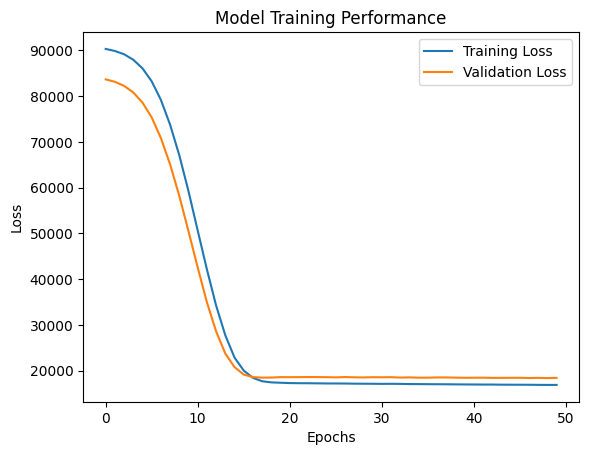

In [17]:
# Loss Plotting
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()